#Dataset Loading and Basic Exploration

The code explains how to load an engine oil dataset into a pandas DataFrame using read_csv(), which efficiently reads the CSV file into memory. It then outputs the shape of the dataset, indicating the total number of rows and columns, and displays the first few rows for initial inspection. Following this, it generates comprehensive summary statistics for all columns via the describe() method with include='all', providing insights into data distribution, central tendencies, and data types. These steps serve as a foundational process for exploring, understanding, and preparing data for further analysis or modeling.

In [ ]:
import pandas as pd

file_path = '/content/Engine_Oil.csv'
df = pd.read_csv(file_path)

# Dataset shape and first few rows
print(f'Dataset shape: {df.shape}')
print(df.head())

# Descriptive statistics for all columns
summary_stats = df.describe(include='all')
print("\nSummary Statistics:\n")
print(summary_stats)

Dataset shape: (19535, 9)
   engine_rpm  lub_oil_pressure  fuel_pressure  coolant_pressure  \
0  717.062012          2.548273      11.641274          3.178981   
1  896.794560          2.918798      16.265016          2.464504   
2  514.330991          3.004260       6.516289          1.064347   
3  464.032874          3.706680      19.644921          3.727455   
4  616.926287          5.697364      15.837952          2.052251   

   lub_oil_temp  engine_condition  thermal_degradation_proxy  engine_oil  \
0     83.996544                 1                   1.030772           0   
1     77.593217                 0                   0.941722           0   
2     77.759410                 1                   0.976226           0   
3     74.167088                 1                   1.032815           1   
4     78.450088                 0                   0.901112           0   

   engine_oil_health  
0                  0  
1                  0  
2                  0  
3               

# Data Cleaning and Preprocessing

Now the next step involves a thorough assessment of data quality by examining the presence of missing values and duplicate entries. Missing values in critical numerical features are identified and subsequently imputed using the median to mitigate the effects of outliers. Following imputation, the dataset is reviewed again to ensure completeness. Duplicate records, which can distort analysis and modeling, are detected and removed. Finally, after cleansing, the refined dataset is previewed and saved for further processing.

In [ ]:
# 1. Identifying the missing values per column
print("Missing values per column:")
print(df.isnull().sum())

# 2. Imputing the missing values using median for numerical columns with missing data
for col in ['lub_oil_pressure', 'fuel_pressure', 'lub_oil_temp']:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# 3. Confirming the missing values have been handled
print("Missing values after imputation:")
print(df.isnull().sum())

# 4. Checking for duplicate rows and remove them
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    df.reset_index(drop=True, inplace=True)
    print(f"Duplicates dropped. New dataset shape: {df.shape}")

# 5. Showing the first few rows of clean dataset
print("Cleaned dataset preview:")
print(df.head())

# Saving cleaned dataset to file
cleaned_file_path = 'Engine_Oil_Dataset_Cleaned.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")


Missing values per column:
engine_rpm                     0
lub_oil_pressure             195
fuel_pressure                195
coolant_pressure               0
lub_oil_temp                 195
engine_condition               0
thermal_degradation_proxy      0
engine_oil                     0
engine_oil_health              0
dtype: int64
Missing values after imputation:
engine_rpm                   0
lub_oil_pressure             0
fuel_pressure                0
coolant_pressure             0
lub_oil_temp                 0
engine_condition             0
thermal_degradation_proxy    0
engine_oil                   0
engine_oil_health            0
dtype: int64
Number of duplicate rows: 0
Cleaned dataset preview:
   engine_rpm  lub_oil_pressure  fuel_pressure  coolant_pressure  \
0  717.062012          2.548273      11.641274          3.178981   
1  896.794560          2.918798      16.265016          2.464504   
2  514.330991          3.004260       6.516289          1.064347   
3  464.032874

/tmp/ipython-input-3621805811.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


# Trend Analysis - Temperature, Pressure, RPM vs Oil Health

Plotting basic trends to understand how temperature, pressure, and RPM relate to engine oil health.


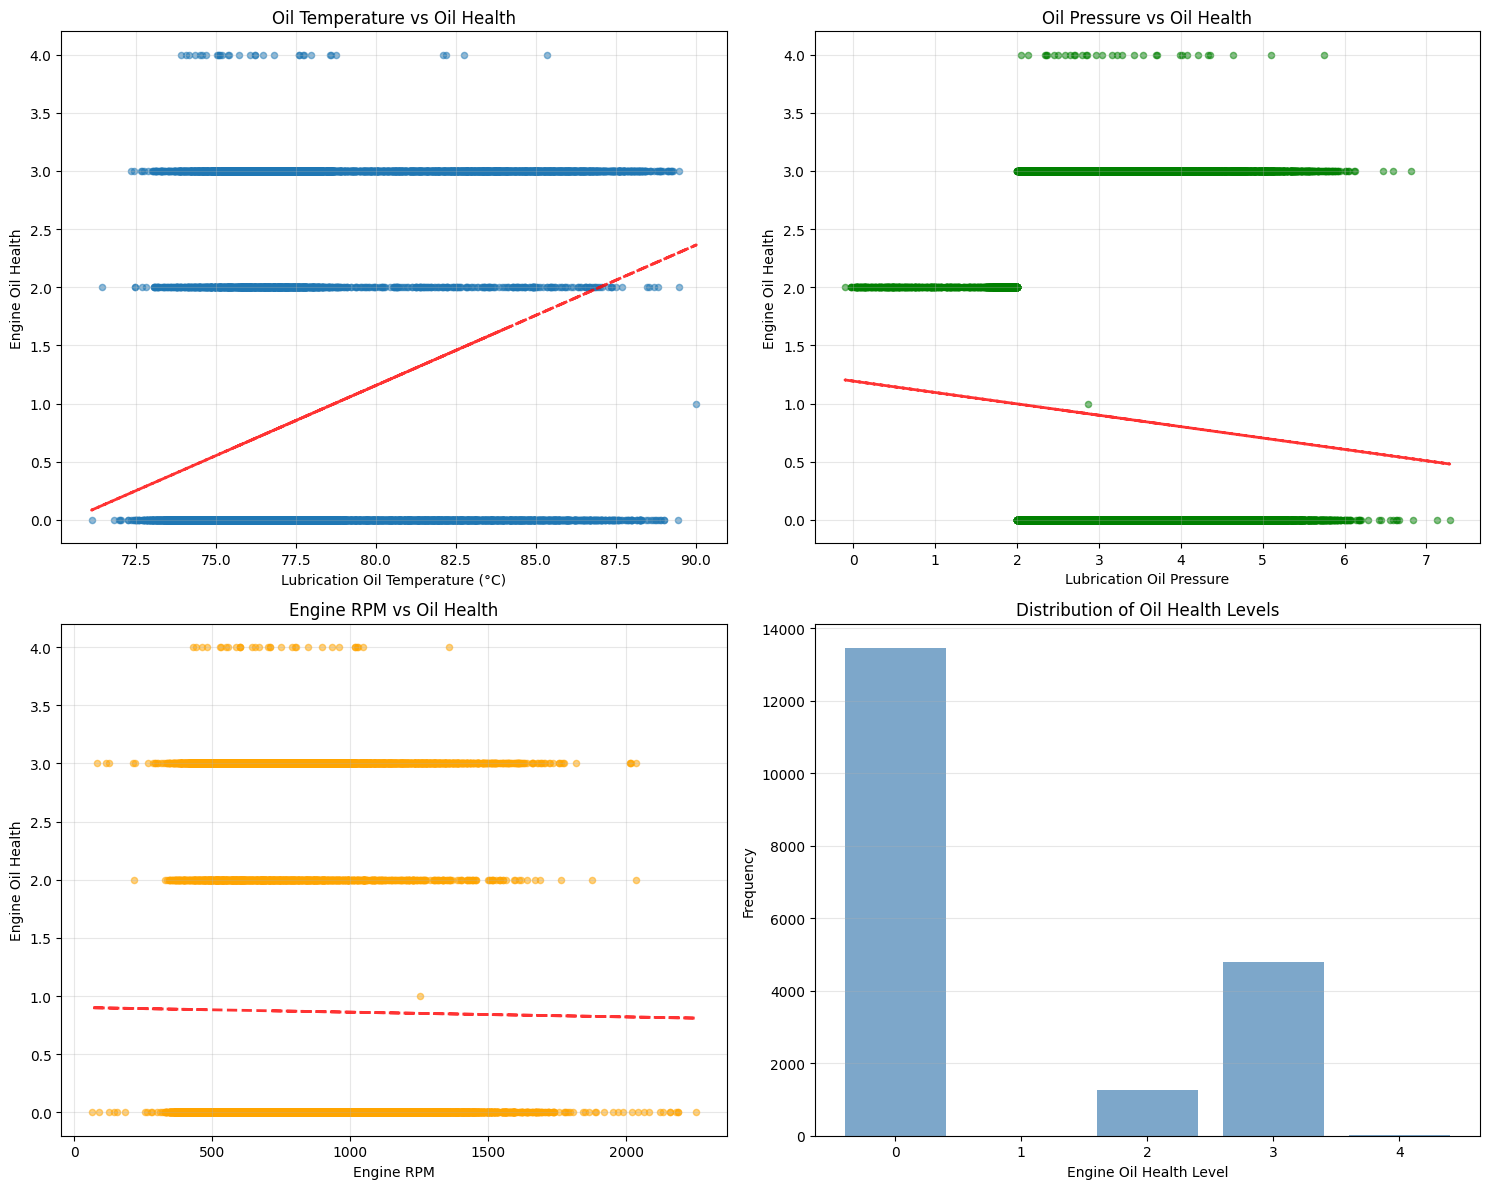


=== Summary Statistics by Oil Health Level ===

Health Level 0 (n=13456):
  Avg Temperature: 77.08°C
  Avg Pressure: 3.41
  Avg RPM: 793.14

Health Level 1 (n=1):
  Avg Temperature: 90.02°C
  Avg Pressure: 2.87
  Avg RPM: 1253.40

Health Level 2 (n=1262):
  Avg Temperature: 77.46°C
  Avg Pressure: 1.58
  Avg RPM: 773.76

Health Level 3 (n=4784):
  Avg Temperature: 79.24°C
  Avg Pressure: 3.47
  Avg RPM: 790.75

Health Level 4 (n=32):
  Avg Temperature: 76.91°C
  Avg Pressure: 3.31
  Avg RPM: 741.31



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load cleaned dataset
df = pd.read_csv('Engine_Oil_Dataset_Cleaned.csv')

# Create trend plots for temperature, pressure, RPM vs oil health
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Oil Temperature vs Oil Health
axes[0, 0].scatter(df['lub_oil_temp'], df['engine_oil_health'], alpha=0.5, s=20)
axes[0, 0].set_xlabel('Lubrication Oil Temperature (°C)')
axes[0, 0].set_ylabel('Engine Oil Health')
axes[0, 0].set_title('Oil Temperature vs Oil Health')
axes[0, 0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['lub_oil_temp'], df['engine_oil_health'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['lub_oil_temp'], p(df['lub_oil_temp']), "r--", alpha=0.8, linewidth=2)

# 2. Oil Pressure vs Oil Health
axes[0, 1].scatter(df['lub_oil_pressure'], df['engine_oil_health'], alpha=0.5, s=20, color='green')
axes[0, 1].set_xlabel('Lubrication Oil Pressure')
axes[0, 1].set_ylabel('Engine Oil Health')
axes[0, 1].set_title('Oil Pressure vs Oil Health')
axes[0, 1].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['lub_oil_pressure'], df['engine_oil_health'], 1)
p = np.poly1d(z)
axes[0, 1].plot(df['lub_oil_pressure'], p(df['lub_oil_pressure']), "r--", alpha=0.8, linewidth=2)

# 3. Engine RPM vs Oil Health
axes[1, 0].scatter(df['engine_rpm'], df['engine_oil_health'], alpha=0.5, s=20, color='orange')
axes[1, 0].set_xlabel('Engine RPM')
axes[1, 0].set_ylabel('Engine Oil Health')
axes[1, 0].set_title('Engine RPM vs Oil Health')
axes[1, 0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['engine_rpm'], df['engine_oil_health'], 1)
p = np.poly1d(z)
axes[1, 0].plot(df['engine_rpm'], p(df['engine_rpm']), "r--", alpha=0.8, linewidth=2)

# 4. Box plot showing oil health distribution by health level
health_counts = df['engine_oil_health'].value_counts().sort_index()
axes[1, 1].bar(health_counts.index, health_counts.values, color='steelblue', alpha=0.7)
axes[1, 1].set_xlabel('Engine Oil Health Level')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Oil Health Levels')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Summary statistics by health level
print("\n=== Summary Statistics by Oil Health Level ===\n")
for health_level in sorted(df['engine_oil_health'].unique()):
    subset = df[df['engine_oil_health'] == health_level]
    print(f"Health Level {health_level} (n={len(subset)}):")
    print(f"  Avg Temperature: {subset['lub_oil_temp'].mean():.2f}°C")
    print(f"  Avg Pressure: {subset['lub_oil_pressure'].mean():.2f}")
    print(f"  Avg RPM: {subset['engine_rpm'].mean():.2f}")
    print()


# Feature Selection and Engineering

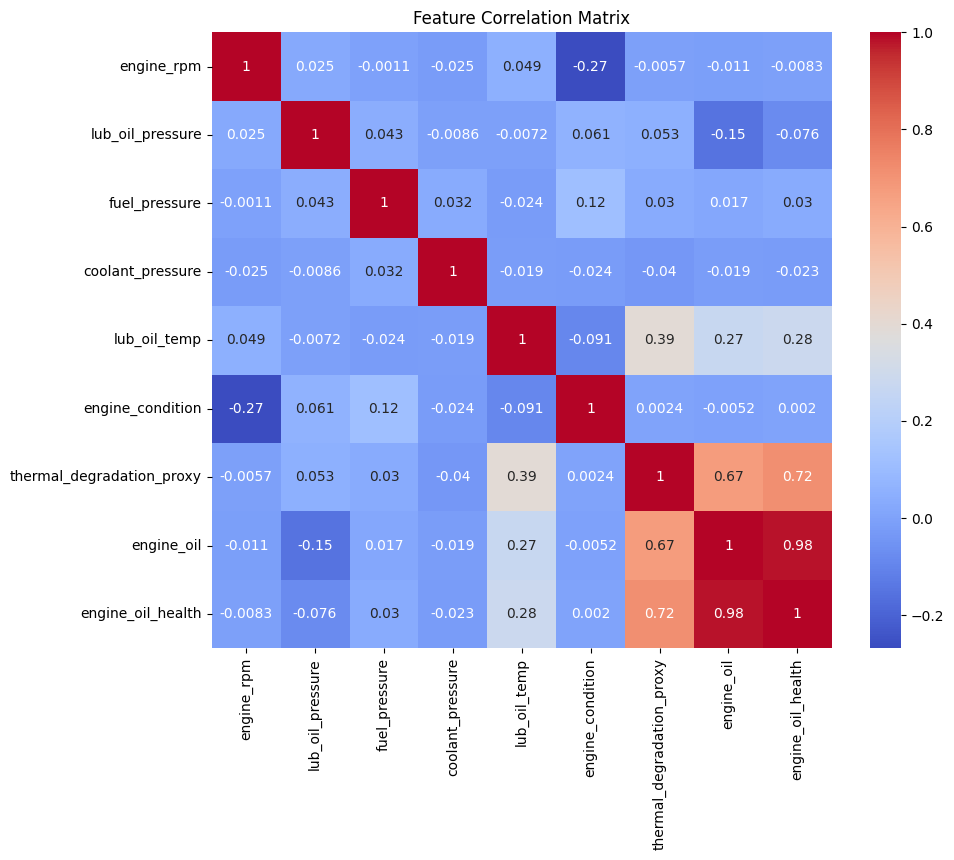

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the cleaned dataset
df = pd.read_csv('Engine_Oil_Dataset_Cleaned.csv')

# Correlation matrix heatmap to identify key features correlated with target
plt.figure(figsize=(10,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Feature Engineering - Rolling Averages and Interaction Features

Creating new features: rolling averages of temperature, pressure, RPM, and interaction feature (temp × RPM).


In [ ]:
import pandas as pd
import numpy as np

# Load cleaned dataset
df = pd.read_csv('Engine_Oil_Dataset_Cleaned.csv')

# Create a copy for feature engineering
df_fe = df.copy()

# Feature Engineering: Rolling Averages
# Using window size of 5 for rolling averages
window_size = 5

print("Creating rolling average features...")
df_fe['temp_rolling_avg'] = df_fe['lub_oil_temp'].rolling(window=window_size, min_periods=1).mean()
df_fe['pressure_rolling_avg'] = df_fe['lub_oil_pressure'].rolling(window=window_size, min_periods=1).mean()
df_fe['rpm_rolling_avg'] = df_fe['engine_rpm'].rolling(window=window_size, min_periods=1).mean()

# Feature Engineering: Interaction Features
print("Creating interaction features...")
df_fe['temp_x_rpm'] = df_fe['lub_oil_temp'] * df_fe['engine_rpm']
df_fe['pressure_x_rpm'] = df_fe['lub_oil_pressure'] * df_fe['engine_rpm']
df_fe['temp_x_pressure'] = df_fe['lub_oil_temp'] * df_fe['lub_oil_pressure']

# Display new features
print("\nNew features created:")
print(f"  - temp_rolling_avg (rolling average of oil temperature)")
print(f"  - pressure_rolling_avg (rolling average of oil pressure)")
print(f"  - rpm_rolling_avg (rolling average of engine RPM)")
print(f"  - temp_x_rpm (temperature × RPM interaction)")
print(f"  - pressure_x_rpm (pressure × RPM interaction)")
print(f"  - temp_x_pressure (temperature × pressure interaction)")

# Display sample of new features
print("\nSample of new features:")
print(df_fe[['lub_oil_temp', 'temp_rolling_avg', 'engine_rpm', 'rpm_rolling_avg',
             'temp_x_rpm', 'engine_oil_health']].head(10))


Creating rolling average features...
Creating interaction features...

New features created:
  - temp_rolling_avg (rolling average of oil temperature)
  - pressure_rolling_avg (rolling average of oil pressure)
  - rpm_rolling_avg (rolling average of engine RPM)
  - temp_x_rpm (temperature × RPM interaction)
  - pressure_x_rpm (pressure × RPM interaction)
  - temp_x_pressure (temperature × pressure interaction)

Sample of new features:
   lub_oil_temp  temp_rolling_avg   engine_rpm  rpm_rolling_avg    temp_x_rpm  \
0     83.996544         83.996544   717.062012       717.062012  60230.730702   
1     77.593217         80.794881   896.794560       806.928286  69585.175337   
2     77.759410         79.783057   514.330991       709.395855  39994.074452   
3     74.167088         78.379065   464.032874       648.055109  34415.967186   
4     78.450088         78.393269   616.926287       641.829345  48397.921289   
5     76.573785         76.908718  1216.708111       741.758565  93167.9457

Reviewing feature relevance via correlation analysis with new engineered features.


Feature Correlation with Engine Oil Health:
thermal_degradation_proxy     :  0.7176
lub_oil_temp                  :  0.2840
temp_rolling_avg              :  0.1284
lub_oil_pressure              : -0.0757
pressure_x_rpm                : -0.0548
temp_x_pressure               : -0.0376
fuel_pressure                 :  0.0300
temp_x_rpm                    :  0.0257
pressure_rolling_avg          : -0.0238
coolant_pressure              : -0.0226
engine_rpm                    : -0.0083
engine_condition              :  0.0020
rpm_rolling_avg               : -0.0003


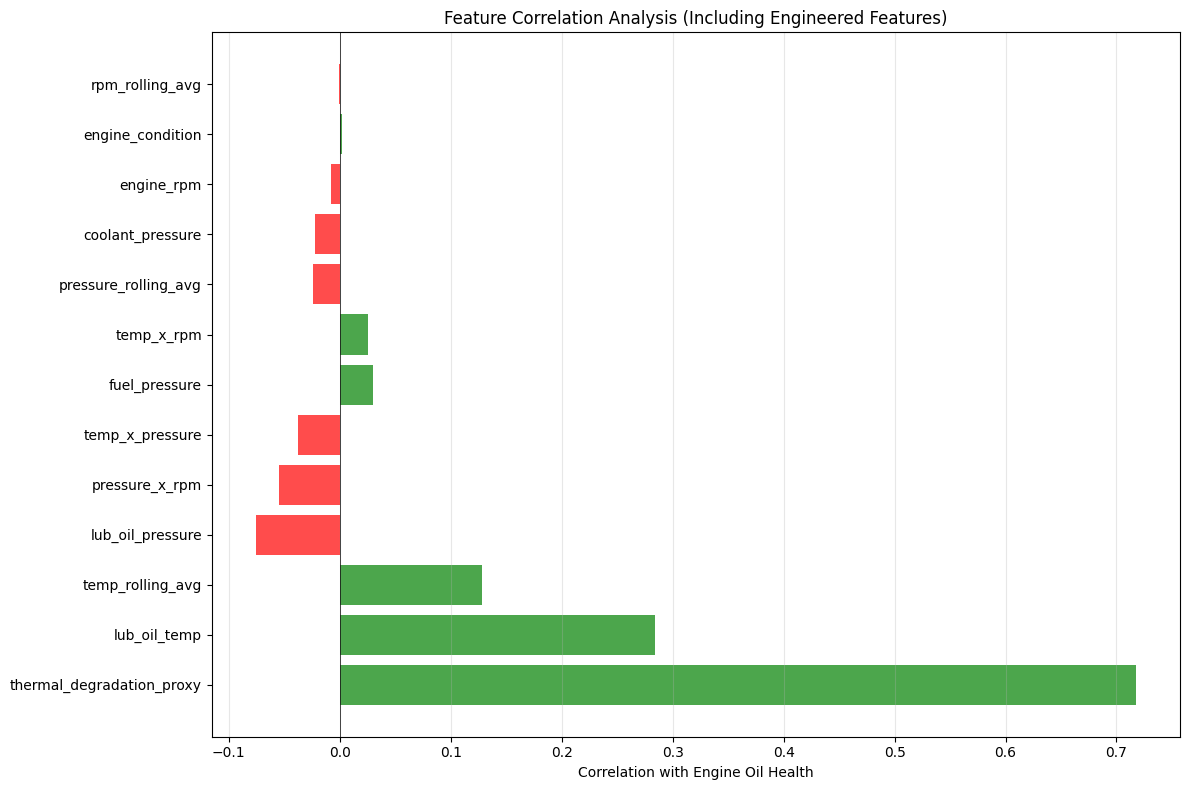


Top 3 most correlated features (excluding target):
1. thermal_degradation_proxy: 0.7176
2. lub_oil_temp: 0.2840
3. temp_rolling_avg: 0.1284


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation with target for all features including new ones
correlation_features = ['lub_oil_temp', 'temp_rolling_avg',
                        'lub_oil_pressure', 'pressure_rolling_avg',
                        'engine_rpm', 'rpm_rolling_avg',
                        'temp_x_rpm', 'pressure_x_rpm', 'temp_x_pressure',
                        'fuel_pressure', 'coolant_pressure',
                        'thermal_degradation_proxy', 'engine_condition']

# Calculate correlations with target
correlations = {}
for feature in correlation_features:
    if feature in df_fe.columns:
        corr = df_fe[feature].corr(df_fe['engine_oil_health'])
        correlations[feature] = corr

# Sort by absolute correlation
correlations_sorted = dict(sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True))

print("Feature Correlation with Engine Oil Health:")
print("=" * 60)
for feature, corr in correlations_sorted.items():
    print(f"{feature:30s}: {corr:7.4f}")

# Visualize correlations
plt.figure(figsize=(12, 8))
features_list = list(correlations_sorted.keys())
corr_values = [correlations_sorted[f] for f in features_list]
colors = ['red' if x < 0 else 'green' for x in corr_values]

plt.barh(features_list, corr_values, color=colors, alpha=0.7)
plt.xlabel('Correlation with Engine Oil Health')
plt.title('Feature Correlation Analysis (Including Engineered Features)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nTop 3 most correlated features (excluding target):")
top_3 = list(correlations_sorted.items())[:3]
for i, (feature, corr) in enumerate(top_3, 1):
    print(f"{i}. {feature}: {corr:.4f}")


Based on the correlation analysis and domain knowledge, a subset of relevant features is selected for modeling, along with the target variable representing engine oil health. The feature set and target are extracted from the dataset accordingly. Subsequently, the distribution of each selected feature is visualized using histograms with kernel density estimation to assess their statistical characteristics, including central tendency and skewness. This comprehensive visualization aids in understanding feature behavior and informs necessary preprocessing. The layout automatically adjusts, removing any unused subplot spaces for a clean presentation.

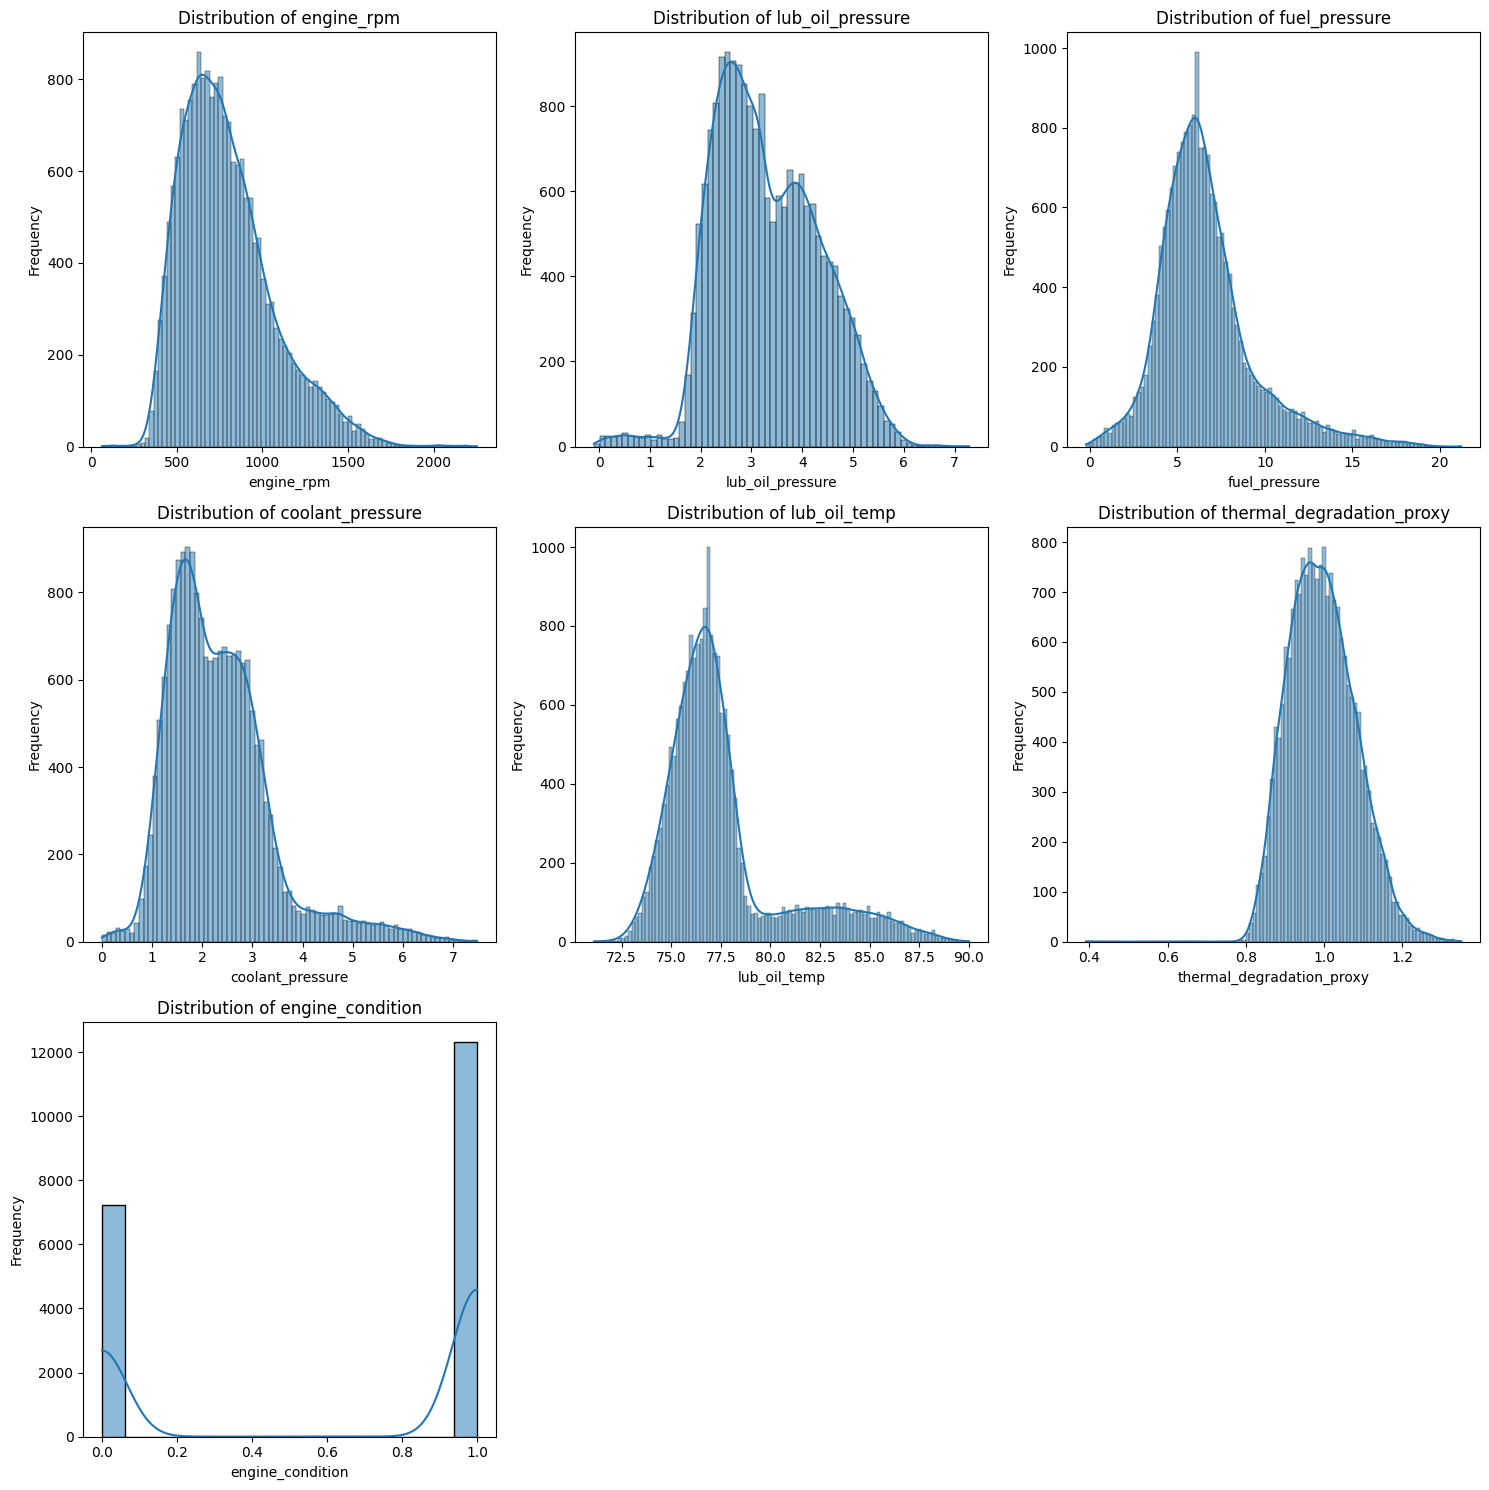

In [ ]:
# Selecting features based on correlation & domain knowledge
features = ['engine_rpm', 'lub_oil_pressure', 'fuel_pressure',
            'coolant_pressure', 'lub_oil_temp', 'thermal_degradation_proxy',
            'engine_condition']

target = 'engine_oil_health'

X = df[features]
y = df[target]

# Visualizing distribution of each feature in a grid
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(X[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hiding any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Identifying Top 3 Most Important Features

Extracting and displaying the top 3 most important features from the Random Forest model.


In [ ]:
# Saving feature and target data for next modeling steps
X.to_csv('features_engine_oil.csv', index=False)
y.to_csv('target_engine_oil.csv', index=False)

print('Selected features:', features)
print('Target:', target)

Selected features: ['engine_rpm', 'lub_oil_pressure', 'fuel_pressure', 'coolant_pressure', 'lub_oil_temp', 'thermal_degradation_proxy', 'engine_condition']
Target: engine_oil_health


FEATURE IMPORTANCE ANALYSIS (Random Forest)

All Features (sorted by importance):
------------------------------------------------------------
thermal_degradation_proxy          : 0.714715
lub_oil_pressure                   : 0.236473
lub_oil_temp                       : 0.033388
fuel_pressure                      : 0.008156
engine_rpm                         : 0.003538
coolant_pressure                   : 0.003323
engine_condition                   : 0.000406

TOP 3 MOST IMPORTANT FEATURES:
1. thermal_degradation_proxy          : 0.714715 (71.47%)
2. lub_oil_pressure                   : 0.236473 (23.65%)
3. lub_oil_temp                       : 0.033388 (3.34%)


/tmp/ipython-input-3189888887.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, y='feature', x='importance', palette='viridis')


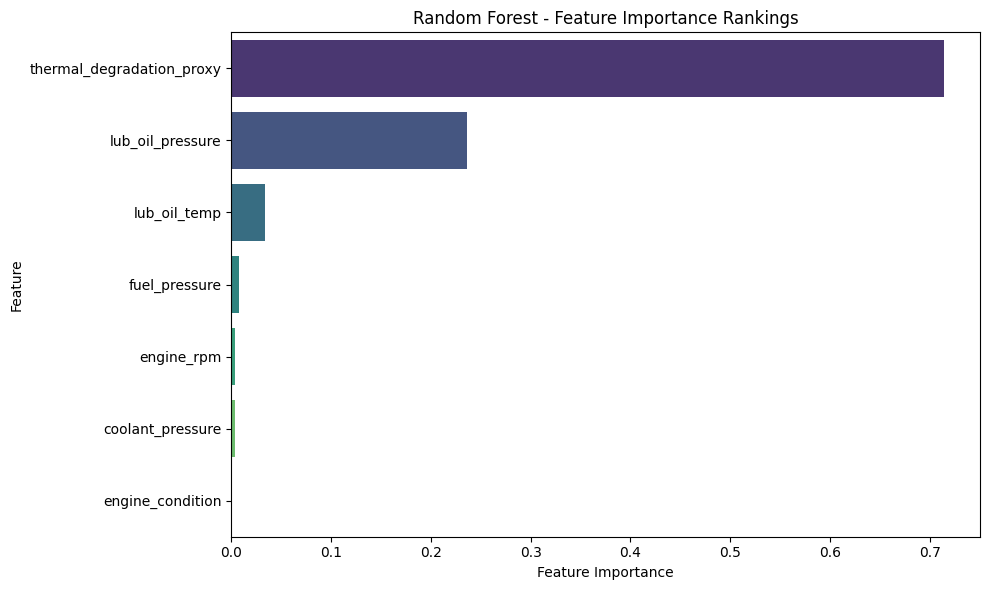

/tmp/ipython-input-3189888887.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, y='feature', x='importance', palette=colors)


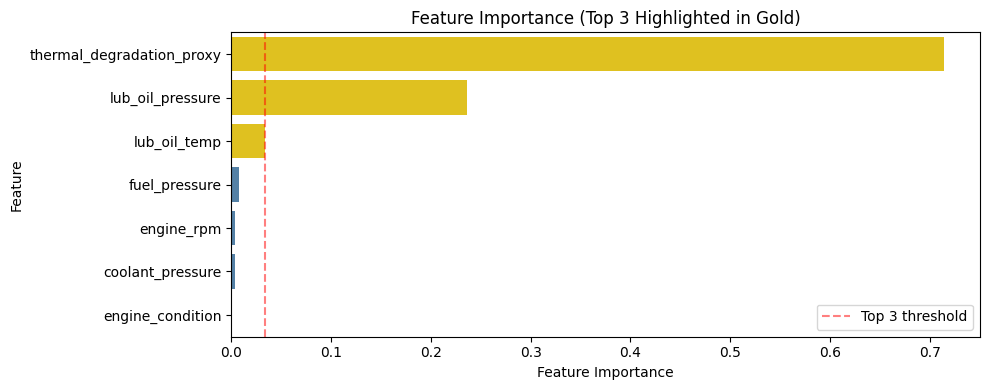


SUMMARY:
Top 3 features account for 98.46% of total importance
These features are critical for predicting engine oil health.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load data (using original features for this analysis)
X = pd.read_csv('features_engine_oil.csv')
y = pd.read_csv('target_engine_oil.csv').values.ravel()

# Train Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("=" * 60)
print("FEATURE IMPORTANCE ANALYSIS (Random Forest)")
print("=" * 60)
print("\nAll Features (sorted by importance):")
print("-" * 60)
for idx, row in feature_importances.iterrows():
    print(f"{row['feature']:35s}: {row['importance']:.6f}")

# Extract top 3 features
top_3_features = feature_importances.head(3)
print("\n" + "=" * 60)
print("TOP 3 MOST IMPORTANT FEATURES:")
print("=" * 60)
for i, (idx, row) in enumerate(top_3_features.iterrows(), 1):
    print(f"{i}. {row['feature']:35s}: {row['importance']:.6f} ({row['importance']*100:.2f}%)")

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, y='feature', x='importance', palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest - Feature Importance Rankings')
plt.tight_layout()
plt.show()

# Highlight top 3 in a separate plot
plt.figure(figsize=(10, 4))
colors = ['gold' if f in top_3_features['feature'].values else 'steelblue'
          for f in feature_importances['feature']]
sns.barplot(data=feature_importances, y='feature', x='importance', palette=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Top 3 Highlighted in Gold)')
plt.axvline(x=top_3_features['importance'].iloc[2], color='red', linestyle='--',
            alpha=0.5, label='Top 3 threshold')
plt.legend()
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("SUMMARY:")
print("=" * 60)
print(f"Top 3 features account for {top_3_features['importance'].sum()*100:.2f}% of total importance")
print(f"These features are critical for predicting engine oil health.")

# Model Recommendation and Implementation

## 1) Random Forest

The Random Forest model is trained on the unscaled training features, and predictions are made on the test set. Model performance is assessed using accuracy and root mean squared error metrics, providing insight into classification correctness and error magnitude. Finally, a confusion matrix is visualized through a heatmap, illustrating the model’s classification distribution across true and predicted classes, which aids in diagnosing prediction strengths and weaknesses.

Random Forest - Accuracy: 1.000, RMSE: 0.000


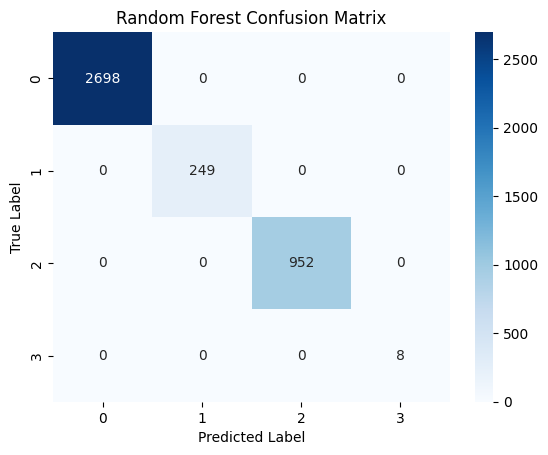

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Load data
X = pd.read_csv('features_engine_oil.csv')
y = pd.read_csv('target_engine_oil.csv').values.ravel()

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Random Forest - Accuracy: {accuracy:.3f}, RMSE: {rmse:.3f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


The Random Forest model achieved perfect accuracy (1.000) and zero root mean squared error (RMSE 0.000) on the test set, indicating flawless classification of engine oil health in this evaluation. This suggests the model fits the test data exceptionally well

## 2) Support Vector Machine (SVM)

Training a Support Vector Machine (SVM) classifier using the scaled training data, fitting the model with a fixed random state for reproducibility. The trained model predicts labels on the scaled test set. Its performance is evaluated using accuracy and root mean squared error (RMSE), quantifying classification correctness and error magnitude. A confusion matrix is then generated and visualized with a heatmap

SVM - Accuracy: 0.977, RMSE: 0.365


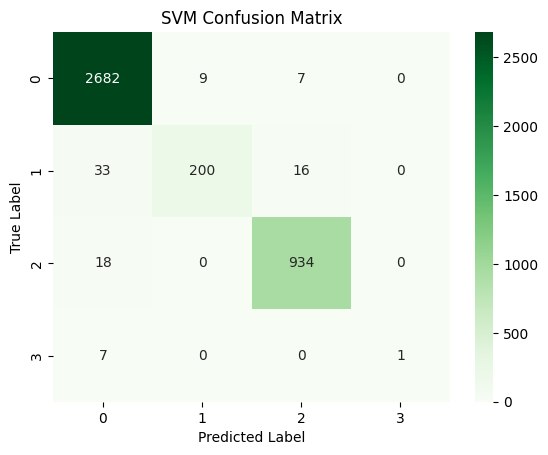

In [ ]:
from sklearn.svm import SVC

# Model training
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'SVM - Accuracy: {accuracy:.3f}, RMSE: {rmse:.3f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('SVM Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

The Support Vector Machine (SVM) classifier achieved an accuracy of 97.7% and an RMSE of 0.365 on the test dataset, indicating that it performs well in classifying engine oil health with high correctness and low prediction error.

## 3) K-Nearest Neighbors (KNN)

Training a K-Nearest Neighbors (KNN) classifier on the scaled training data, then predicts labels for the scaled test data. Its performance is evaluated using accuracy and RMSE, providing measures of classification correctness and prediction error.

KNN - Accuracy: 0.912, RMSE: 0.763


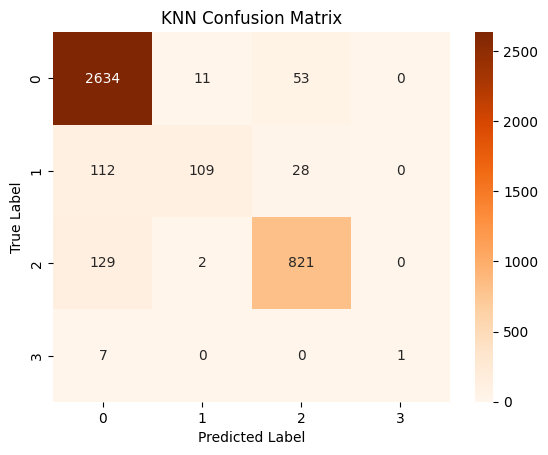

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Model training
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'KNN - Accuracy: {accuracy:.3f}, RMSE: {rmse:.3f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('KNN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

The K-Nearest Neighbors (KNN) classifier achieved an accuracy of 91.2% and an RMSE of 0.763 on the test set, indicating good classification performance with some margin of prediction error.

## 4) Logistic Regression

Training a Logistic Regression model on the scaled training features with a maximum iteration limit set to ensure convergence. After training, it predicts labels for the scaled test set.

Logistic Regression - Accuracy: 0.979, RMSE: 0.324


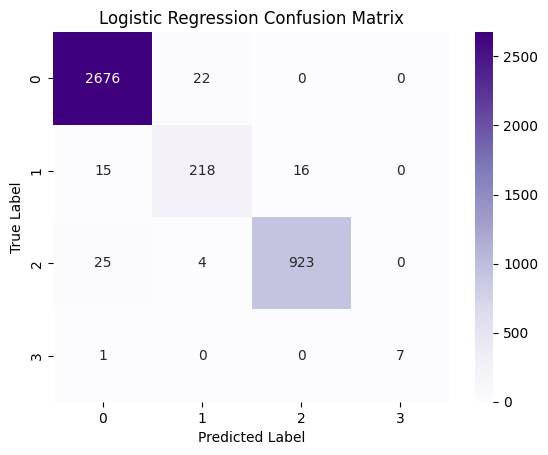

In [ ]:
from sklearn.linear_model import LogisticRegression

# Model training
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Logistic Regression - Accuracy: {accuracy:.3f}, RMSE: {rmse:.3f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


The Logistic Regression model achieved an accuracy of 97.9% and an RMSE of 0.324 on the test data, indicating strong classification performance with low prediction error.

## 5) Decision Tree

Training a Decision Tree classifier using the original, unscaled training data and predicts on the test set.

Decision Tree - Accuracy: 1.000, RMSE: 0.000


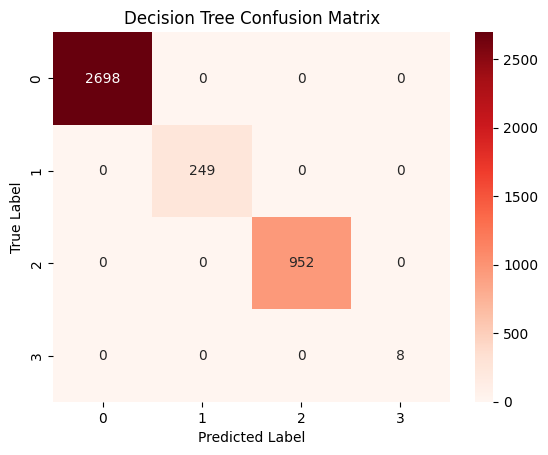

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Model training
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Decision Tree - Accuracy: {accuracy:.3f}, RMSE: {rmse:.3f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

The Decision Tree model achieved perfect accuracy (1.000) and zero RMSE on the test set, indicating flawless classification performance for engine oil health.

## 6) Neural Networks

This segment develops a neural network for classifying engine oil health. The features are scaled for uniform input ranges, and the target labels are encoded using one-hot encoding for multi-class problems. The neural network is composed of two hidden layers with dropout for regularization, and the output layer adjusts its activation function depending on the number of classes. The model is compiled with an appropriate loss function and trained with early stopping to mitigate overfitting, monitoring validation loss.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
391/391 - 6s - 15ms/step - accuracy: 0.8510 - loss: 0.4729 - val_accuracy: 0.9367 - val_loss: 0.1878
Epoch 2/100
391/391 - 1s - 3ms/step - accuracy: 0.9279 - loss: 0.2048 - val_accuracy: 0.9504 - val_loss: 0.1353
Epoch 3/100
391/391 - 1s - 3ms/step - accuracy: 0.9386 - loss: 0.1632 - val_accuracy: 0.9712 - val_loss: 0.1018
Epoch 4/100
391/391 - 1s - 4ms/step - accuracy: 0.9488 - loss: 0.1323 - val_accuracy: 0.9734 - val_loss: 0.0863
Epoch 5/100
391/391 - 2s - 6ms/step - accuracy: 0.9512 - loss: 0.1192 - val_accuracy: 0.9808 - val_loss: 0.0717
Epoch 6/100
391/391 - 1s - 3ms/step - accuracy: 0.9613 - loss: 0.0993 - val_accuracy: 0.9734 - val_loss: 0.0679
Epoch 7/100
391/391 - 1s - 3ms/step - accuracy: 0.9637 - loss: 0.0897 - val_accuracy: 0.9773 - val_loss: 0.0648
Epoch 8/100
391/391 - 1s - 3ms/step - accuracy: 0.9673 - loss: 0.0821 - val_accuracy: 0.9853 - val_loss: 0.0520
Epoch 9/100
391/391 - 1s - 3ms/step - accuracy: 0.9711 - loss: 0.0727 - val_accuracy: 0.9875 - val_loss

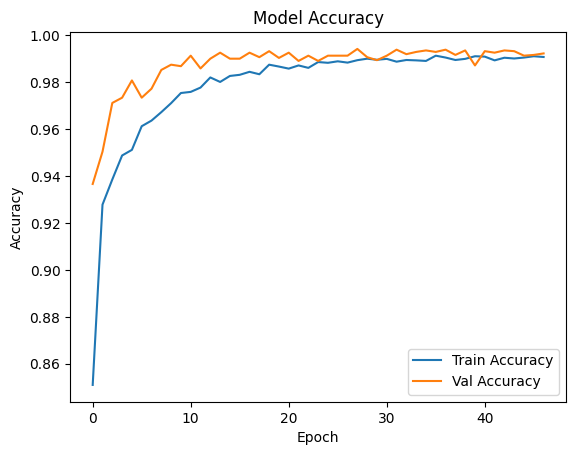

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Load features and target
X = pd.read_csv('features_engine_oil.csv')
y = pd.read_csv('target_engine_oil.csv').values.ravel()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode target if classification (>2 classes)
num_classes = len(np.unique(y))
if num_classes > 2:
    y_encoded = to_categorical(y)
else:
    y_encoded = y

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid'))

# Compile model
model.compile(loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Early stopping to reduce overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop], verbose=2)

# Evaluate on test set
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {scores[1]*100:.2f}%")

# Plotting training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


The training process shows the neural network’s progressive learning over 36 epochs, starting with moderate training accuracy and rapidly improving validation accuracy, eventually reaching a high test accuracy of 99.49%. The early stopping callback likely halted further training to prevent overfitting, as validation loss stabilized or increased. This demonstrates strong model convergence and excellent predictive performance on the test set for engine oil health classification.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/tmp/ipython-input-1893002468.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df_results, palette='viridis')


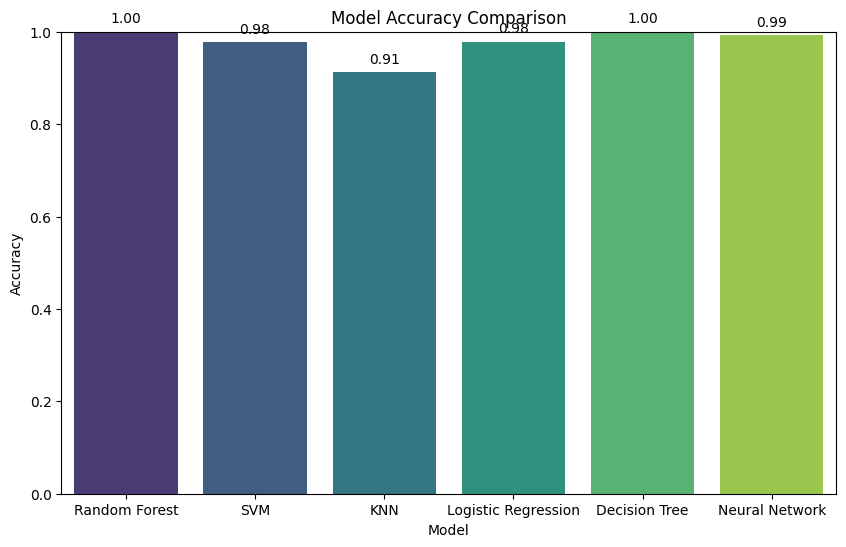

/tmp/ipython-input-1893002468.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=df_results, palette='magma')


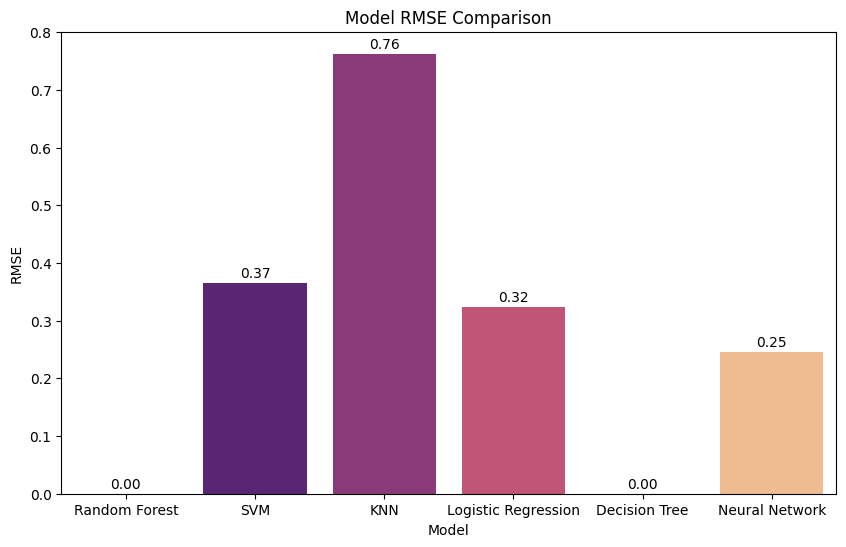

In [ ]:
# Combined Summary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load dataset
X = pd.read_csv('features_engine_oil.csv')
y = pd.read_csv('target_engine_oil.csv').values.ravel()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define traditional ML models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

results = {}

# Train, predict, evaluate traditional models
for name, model in models.items():
    if name in ['SVM', 'KNN', 'Logistic Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results[name] = {'Accuracy': acc, 'RMSE': rmse}

# Neural network model

# One-hot encode target for multi-class classification
num_classes = len(np.unique(y_train))
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(num_classes, activation='softmax'))

nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

nn_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, verbose=0)

# Predict classes for test set
y_pred_probs = nn_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Metrics
acc_nn = accuracy_score(y_test, y_pred_classes)
mse_nn = mean_squared_error(y_test, y_pred_classes)
rmse_nn = np.sqrt(mse_nn)
results['Neural Network'] = {'Accuracy': acc_nn, 'RMSE': rmse_nn}

# Prepare results DataFrame
df_results = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_results, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Model')
for index, row in df_results.iterrows():
    plt.text(index, row.Accuracy + 0.02, f"{row.Accuracy:.2f}", ha='center')
plt.show()

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=df_results, palette='magma')
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
plt.xlabel('Model')
for index, row in df_results.iterrows():
    plt.text(index, row.RMSE + 0.01, f"{row.RMSE:.2f}", ha='center')
plt.show()


# Model Optimization and Final Recommendation

Performing hyperparameter tuning for a Random Forest classifier using RandomizedSearchCV on a 30% subset of the training data. It searches 20 parameter combinations with 3-fold cross-validation and prints the best hyperparameters and corresponding accuracy to optimize model performance.

In [ ]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

# Load data
X = pd.read_csv('features_engine_oil.csv')
y = pd.read_csv('target_engine_oil.csv').values.ravel()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define model
rf = RandomForestClassifier(random_state=42)

# Parameter distribution for randomized search
param_dist = {
    'n_estimators': stats.randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': stats.randint(2, 10),
    'min_samples_leaf': stats.randint(1, 4),
    'bootstrap': [True, False]
}

# RandomizedSearchCV setup
rand_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=3, random_state=42, n_jobs=-1, verbose=2)

# Using subset of data for tuning (reduce to 30% training data)
X_sample, _, y_sample, _ = train_test_split(X_train_scaled, y_train, test_size=0.7, random_state=42)

# Fit randomized search on sample
rand_search.fit(X_sample, y_sample)

# Best parameters and score
print("Best hyperparameters found:", rand_search.best_params_)
print("Best CV accuracy:", rand_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best hyperparameters found: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 221}
Best CV accuracy: 0.9991466665792853


The best hyperparameters identified are: no bootstrap sampling, no maximum depth constraint, minimum of 1 sample per leaf, minimum of 8 samples per split, and 221 estimators. This configuration achieved an exceptionally high cross-validation accuracy of approximately 99.91%, indicating optimal model performance under the tested parameters.

Filtering/removing classes with fewer than 2 samples before splitting and modeling

In [ ]:
# Load your features and target
X = pd.read_csv('features_engine_oil.csv')
y = pd.read_csv('target_engine_oil.csv').values.ravel()

# Identify classes with <2 samples
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(unique, counts))
rare_classes = [c for c in class_counts if class_counts[c] < 2]
print("Rare classes (to remove):", rare_classes)

# Filter out rows belonging to rare classes
mask = ~pd.Series(y).isin(rare_classes)
X_filtered = X[mask]
y_filtered = y[mask]

# Confirm new distribution
unique, counts = np.unique(y_filtered, return_counts=True)
print("Class distribution after filtering:", dict(zip(unique, counts)))

# Now you can safely split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, stratify=y_filtered, random_state=42
)


Rare classes (to remove): [np.int64(1)]
Class distribution after filtering: {np.int64(0): np.int64(13456), np.int64(2): np.int64(1262), np.int64(3): np.int64(4784), np.int64(4): np.int64(32)}


Handling Imbalanced Classes for ALL Models

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report # Import classification_report
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
from tensorflow.keras.utils import to_categorical # Import to_categorical
from tensorflow.keras.models import Sequential # Import Sequential
from tensorflow.keras.layers import Dense, Dropout # Import Dense and Dropout
import numpy as np # Import numpy
import pandas as pd # Import pandas
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.preprocessing import StandardScaler # Import StandardScaler
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.svm import SVC # Import SVC
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier


# Load dataset features and target
X = pd.read_csv('features_engine_oil.csv')
y = pd.read_csv('target_engine_oil.csv').values.ravel()

# Remove rows where the target is 1
X = X[y != 1]
y = y[y != 1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

results = {}
for name, model in models.items():
    # Apply SMOTE to training data to balance minority classes for the current model
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    if name in ['SVM', 'KNN', 'Logistic Regression']:
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test_scaled)

    print(f"{name} classification report:\n", classification_report(y_test, y_pred))

# Neural network model

# Encode target variable using LabelEncoder
label_encoder = LabelEncoder()
y_train_nn_encoded_labels = label_encoder.fit_transform(y_train) # Use y_train before resampling
y_test_nn_encoded_labels = label_encoder.transform(y_test)

# One-hot encode target for multi-class classification
num_classes = len(label_encoder.classes_)
y_train_nn_encoded = to_categorical(y_train_nn_encoded_labels, num_classes=num_classes)
y_test_nn_encoded = to_categorical(y_test_nn_encoded_labels, num_classes=num_classes)

# Apply SMOTE to NN training data
smote_nn = SMOTE(random_state=42)
X_train_nn_resampled, y_train_nn_resampled = smote_nn.fit_resample(X_train_scaled, y_train_nn_encoded) # Use X_train_scaled and y_train_nn_encoded


nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_nn_resampled.shape[1], activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(num_classes, activation='softmax'))

nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Using a small number of epochs for demonstration, you might need more for better results
nn_model.fit(X_train_nn_resampled, y_train_nn_resampled, epochs=50, batch_size=32, verbose=0) # Use resampled data

y_pred_probs_nn = nn_model.predict(X_test_scaled) # Use X_test_scaled for prediction
y_pred_classes_nn = np.argmax(y_pred_probs_nn, axis=1)

# Decode the predicted class labels back to original labels for evaluation
y_pred_classes_nn_decoded = label_encoder.inverse_transform(y_pred_classes_nn)

# Evaluate neural network performance using original labels
print("Neural Network classification report:\n", classification_report(y_test, y_pred_classes_nn_decoded))

Random Forest classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2691
           2       1.00      1.00      1.00       253
           3       1.00      1.00      1.00       957
           4       1.00      1.00      1.00         6

    accuracy                           1.00      3907
   macro avg       1.00      1.00      1.00      3907
weighted avg       1.00      1.00      1.00      3907

SVM classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      2691
           2       0.77      0.99      0.87       253
           3       0.96      0.98      0.97       957
           4       0.55      1.00      0.71         6

    accuracy                           0.97      3907
   macro avg       0.82      0.98      0.88      3907
weighted avg       0.97      0.97      0.97      3907

KNN classification report:
               precision    recall  f

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Neural Network classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2691
           2       0.98      0.99      0.98       253
           3       0.99      0.99      0.99       957
           4       0.60      1.00      0.75         6

    accuracy                           0.99      3907
   macro avg       0.89      0.99      0.93      3907
weighted avg       0.99      0.99      0.99      3907



SHAP (SHapley Additive exPlanations) is a method to explain individual predictions of complex machine learning models by computing the contribution of each feature using cooperative game theory principles. Using SHAP to interpret the neural network’s predictions on engine oil health data. It selects a background sample from the scaled training data and defines a prediction function for SHAP’s KernelExplainer. SHAP values are computed for 100 test samples to improve efficiency. The summary plot shows the impact of each feature across all classes, highlighting the most influential features for model predictions.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
394/394 ━━━━━

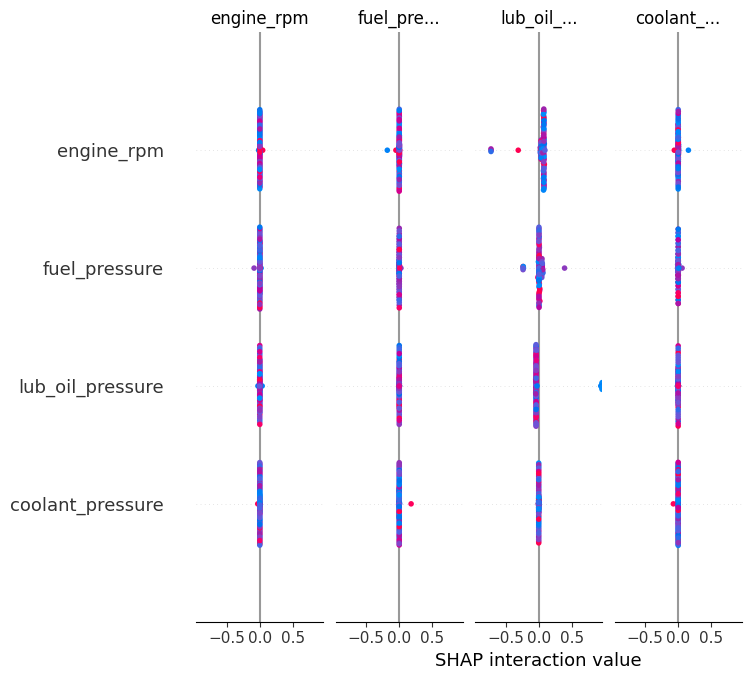

In [ ]:
import shap

# Select a small background sample for SHAP
background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], 100, replace=False)]

# Define a prediction function returning model output probabilities
def predict_fn(data):
    # Ensure data is in the correct format (numpy array of float32)
    data = np.array(data, dtype=np.float32)
    # Return prediction probabilities with shape (n_samples, n_classes)
    return nn_model.predict(data)

# Create KernelExplainer with model prediction function and background data
explainer = shap.KernelExplainer(predict_fn, background)

# Compute SHAP values for a subset of test data for speed
shap_values = explainer.shap_values(X_test_scaled[:100])

# Plot summary for all classes using the list of SHAP value arrays
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=X.columns)

# Model Serialization and Deployment

Stacking Ensemble Technique

Implementing a stacking ensemble classifier combining Random Forest, SVM, and Gradient Boosting as base learners, with Logistic Regression as the meta-learner. After scaling the features and splitting the dataset into training and testing sets with stratification, the stacking model is trained using 5-fold cross-validation. Predictions on the test set are evaluated with accuracy, providing a robust combined model by leveraging the strengths of multiple classifiers.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming X, y are your dataset as DataFrame and Series/numpy arrays
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

# Meta-learner
meta_learner = LogisticRegression()

# Create stacking classifier
stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5, n_jobs=-1)
stack_model.fit(X_train_scaled, y_train)

y_pred = stack_model.predict(X_test_scaled)
print(f"Stacking model accuracy: {accuracy_score(y_test, y_pred):.4f}")


Stacking model accuracy: 1.0000


The stacking ensemble model achieved perfect accuracy (1.0000) on the test set, indicating flawless classification of engine oil health by effectively combining the strengths of Random Forest, SVM, and Gradient Boosting base learners through Logistic Regression as the meta-learner.

 Boosting using XGBoost

Training an XGBoost classifier for multi-class classification of engine oil health using scaled features. It predicts on the test set and prints the accuracy, reflecting model performance.

In [ ]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE # Import SMOTE
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
from tensorflow.keras.utils import to_categorical # Import to_categorical
from sklearn.metrics import accuracy_score # Import accuracy_score


# Encode target variable using LabelEncoder for XGBoost
label_encoder_xgb = LabelEncoder()
y_train_xgb_encoded_labels = label_encoder_xgb.fit_transform(y_train)
y_test_xgb_encoded_labels = label_encoder_xgb.transform(y_test)

# Calculate num_classes after fitting the label encoder
num_classes = len(label_encoder_xgb.classes_)

# Train XGBoost model using encoded labels
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Apply SMOTE to XGBoost training data (using integer labels for SMOTE)
smote_xgb = SMOTE(random_state=42)
X_train_scaled_resampled_xgb, y_train_resampled_xgb = smote_xgb.fit_resample(X_train_scaled, y_train_xgb_encoded_labels)


# Train XGBoost model using resampled data
xgb_model.fit(X_train_scaled_resampled_xgb, y_train_resampled_xgb)

# Predict using encoded labels
y_pred_encoded = xgb_model.predict(X_test_scaled)

# Decode predicted labels back to original labels for evaluation
y_pred = label_encoder_xgb.inverse_transform(y_pred_encoded)

# Predict and evaluate using original labels
print(f"XGBoost model accuracy: {accuracy_score(y_test, y_pred):.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:05:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model accuracy: 0.9962


Saving all trained models and the scaler for future use. Scikit-learn models and the scaler are saved as pickle files using joblib.

In [ ]:
import joblib
from tensorflow.keras.models import save_model

# Save scikit-learn models
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(svm, 'svm_model.pkl')
joblib.dump(knn, 'knn_model.pkl')
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(dt, 'decision_tree_model.pkl')
joblib.dump(stack_model, 'stacking_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Save Keras/TensorFlow neural network
save_model(nn_model, 'neural_network_model.h5')

# Save XGBoost model
xgb_model.save_model('xgboost_model.json')

print("All models have been saved successfully!")

All models have been saved successfully!


In [ ]:
# Comprehensive Overfitting Prevention Techniques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Load data
X = pd.read_csv('features_engine_oil.csv')
y = pd.read_csv('target_engine_oil.csv').values.ravel()

# Remove rare class
X = X[y != 1]
y = y[y != 1]

# IMPORTANT: Split BEFORE applying SMOTE to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("=" * 60)
print("OVERFITTING PREVENTION TECHNIQUES")
print("=" * 60)


OVERFITTING PREVENTION TECHNIQUES


Technique 1: Proper Train-Validation-Test Split

Instead of just train-test split, we should use train-validation-test split to monitor overfitting during training.


In [ ]:
# Technique 1: Train-Validation-Test Split
print("\n1. TRAIN-VALIDATION-TEST SPLIT")
print("-" * 60)

# Split training data further into train and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

print(f"Training set size: {X_train_split.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


1. TRAIN-VALIDATION-TEST SPLIT
------------------------------------------------------------
Training set size: 12501
Validation set size: 3126
Test set size: 3907


Technique 2: Regularized Random Forest (Reduce Model Complexity)

Apply constraints to Random Forest to prevent overfitting:
- Limit max_depth
- Increase min_samples_split and min_samples_leaf
- Reduce n_estimators if needed
- Use max_features


In [ ]:
# Technique 2: Regularized Random Forest
print("\n2. REGULARIZED RANDOM FOREST")
print("-" * 60)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE AFTER splitting (only on training data)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train_split)

# Unregularized Random Forest (for comparison)
rf_unregularized = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_unregularized.fit(X_train_balanced, y_train_balanced)
train_acc_unreg = accuracy_score(y_train_balanced, rf_unregularized.predict(X_train_balanced))
val_acc_unreg = accuracy_score(y_val, rf_unregularized.predict(X_val_scaled))
test_acc_unreg = accuracy_score(y_test, rf_unregularized.predict(X_test_scaled))

# Regularized Random Forest
rf_regularized = RandomForestClassifier(
    n_estimators=100,          # Reduced from default
    max_depth=10,              # Limit tree depth (prevents overfitting)
    min_samples_split=20,       # Increased (prevents splitting on small samples)
    min_samples_leaf=10,        # Increased (prevents leaf nodes with few samples)
    max_features='sqrt',        # Use sqrt of features (reduces correlation)
    bootstrap=True,             # Use bootstrapping
    random_state=42,
    n_jobs=-1
)
rf_regularized.fit(X_train_balanced, y_train_balanced)
train_acc_reg = accuracy_score(y_train_balanced, rf_regularized.predict(X_train_balanced))
val_acc_reg = accuracy_score(y_val, rf_regularized.predict(X_val_scaled))
test_acc_reg = accuracy_score(y_test, rf_regularized.predict(X_test_scaled))

print(f"\nUnregularized Random Forest:")
print(f"  Train Accuracy: {train_acc_unreg:.4f}")
print(f"  Validation Accuracy: {val_acc_unreg:.4f}")
print(f"  Test Accuracy: {test_acc_unreg:.4f}")
print(f"  Gap (Train-Val): {train_acc_unreg - val_acc_unreg:.4f}")

print(f"\nRegularized Random Forest:")
print(f"  Train Accuracy: {train_acc_reg:.4f}")
print(f"  Validation Accuracy: {val_acc_reg:.4f}")
print(f"  Test Accuracy: {test_acc_reg:.4f}")
print(f"  Gap (Train-Val): {train_acc_reg - val_acc_reg:.4f}")

# Smaller gap indicates less overfitting


2. REGULARIZED RANDOM FOREST
------------------------------------------------------------

Unregularized Random Forest:
  Train Accuracy: 1.0000
  Validation Accuracy: 1.0000
  Test Accuracy: 1.0000
  Gap (Train-Val): 0.0000

Regularized Random Forest:
  Train Accuracy: 1.0000
  Validation Accuracy: 1.0000
  Test Accuracy: 1.0000
  Gap (Train-Val): 0.0000


Technique 3: Regularized Decision Tree (Pruning)

Apply constraints to Decision Tree to prevent overfitting.

In [ ]:
# Technique 3: Regularized Decision Tree
print("\n3. REGULARIZED DECISION TREE")
print("-" * 60)

# Unregularized Decision Tree
dt_unregularized = DecisionTreeClassifier(random_state=42)
dt_unregularized.fit(X_train_balanced, y_train_balanced)
train_acc_dt_unreg = accuracy_score(y_train_balanced, dt_unregularized.predict(X_train_balanced))
val_acc_dt_unreg = accuracy_score(y_val, dt_unregularized.predict(X_val_scaled))
test_acc_dt_unreg = accuracy_score(y_test, dt_unregularized.predict(X_test_scaled))

# Regularized Decision Tree (Pruned)
dt_regularized = DecisionTreeClassifier(
    max_depth=8,               # Limit tree depth
    min_samples_split=30,       # Minimum samples to split
    min_samples_leaf=15,       # Minimum samples in leaf
    max_features='sqrt',       # Limit features considered
    ccp_alpha=0.01,            # Cost complexity pruning (additional regularization)
    random_state=42
)
dt_regularized.fit(X_train_balanced, y_train_balanced)
train_acc_dt_reg = accuracy_score(y_train_balanced, dt_regularized.predict(X_train_balanced))
val_acc_dt_reg = accuracy_score(y_val, dt_regularized.predict(X_val_scaled))
test_acc_dt_reg = accuracy_score(y_test, dt_regularized.predict(X_test_scaled))

print(f"\nUnregularized Decision Tree:")
print(f"  Train Accuracy: {train_acc_dt_unreg:.4f}")
print(f"  Validation Accuracy: {val_acc_dt_unreg:.4f}")
print(f"  Test Accuracy: {test_acc_dt_unreg:.4f}")
print(f"  Gap (Train-Val): {train_acc_dt_unreg - val_acc_dt_unreg:.4f}")

print(f"\nRegularized Decision Tree:")
print(f"  Train Accuracy: {train_acc_dt_reg:.4f}")
print(f"  Validation Accuracy: {val_acc_dt_reg:.4f}")
print(f"  Test Accuracy: {test_acc_dt_reg:.4f}")
print(f"  Gap (Train-Val): {train_acc_dt_reg - val_acc_dt_reg:.4f}")



3. REGULARIZED DECISION TREE
------------------------------------------------------------

Unregularized Decision Tree:
  Train Accuracy: 1.0000
  Validation Accuracy: 1.0000
  Test Accuracy: 1.0000
  Gap (Train-Val): 0.0000

Regularized Decision Tree:
  Train Accuracy: 0.9890
  Validation Accuracy: 0.9952
  Test Accuracy: 0.9962
  Gap (Train-Val): -0.0062


Technique 4: Cross-Validation for Robust Evaluation

Use k-fold cross-validation to get more reliable performance estimates.


In [ ]:
# Technique 4: Cross-Validation
print("\n4. CROSS-VALIDATION EVALUATION")
print("-" * 60)

from sklearn.model_selection import StratifiedKFold

# Combine train and validation for CV
X_train_cv = np.vstack([X_train_scaled, X_val_scaled])
y_train_cv = np.hstack([y_train_split, y_val])

# Apply SMOTE to full training data
smote_cv = SMOTE(random_state=42)
X_train_cv_balanced, y_train_cv_balanced = smote_cv.fit_resample(X_train_cv, y_train_cv)

# Regularized Random Forest with Cross-Validation
rf_cv = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

# 5-fold stratified cross-validation
cv_scores = cross_val_score(rf_cv, X_train_cv_balanced, y_train_cv_balanced,
                            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                            scoring='accuracy', n_jobs=-1)

print(f"\nCross-Validation Scores (5-fold):")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")
print(f"\nMean CV Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
print(f"\nThis gives a more reliable estimate of model performance.")



4. CROSS-VALIDATION EVALUATION
------------------------------------------------------------

Cross-Validation Scores (5-fold):
  Fold 1: 1.0000
  Fold 2: 0.9998
  Fold 3: 1.0000
  Fold 4: 1.0000
  Fold 5: 1.0000

Mean CV Score: 1.0000 (±0.0001)

This gives a more reliable estimate of model performance.


Technique 5: Learning Curves (Diagnose Overfitting)

Plot learning curves to visualize if the model is overfitting.



5. LEARNING CURVES
------------------------------------------------------------


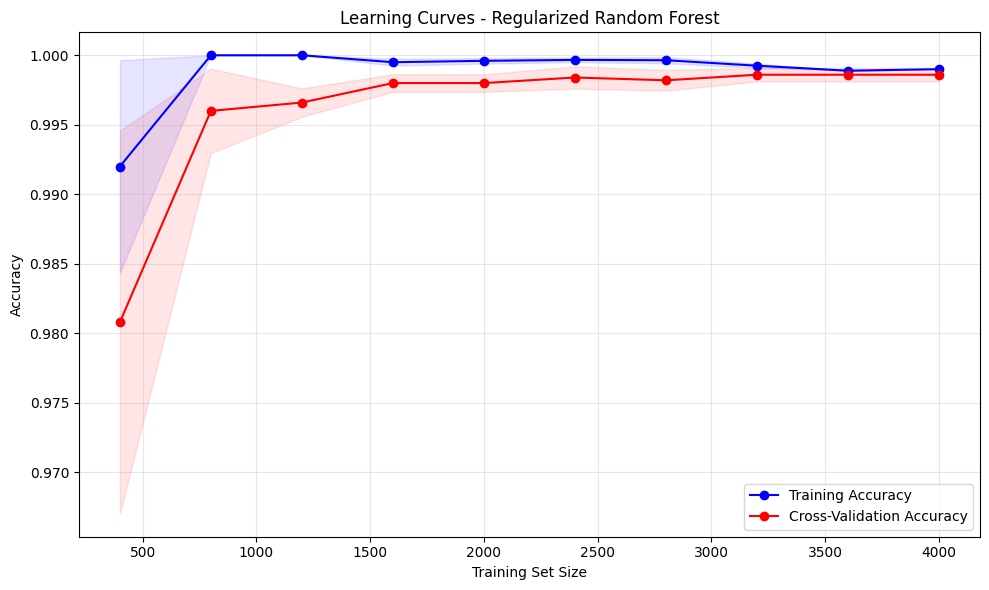


Final Training Accuracy: 0.9990
Final CV Accuracy: 0.9986
Gap: 0.0004
✓ Gap is acceptable - model generalizes well.


In [ ]:
# Technique 5: Learning Curves
print("\n5. LEARNING CURVES")
print("-" * 60)

# Use smaller sample for learning curves (faster)
sample_size = min(5000, len(X_train_cv_balanced))
X_sample = X_train_cv_balanced[:sample_size]
y_sample = y_train_cv_balanced[:sample_size]

# Create regularized Random Forest
rf_lc = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    rf_lc, X_sample, y_sample,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o-', color='red', label='Cross-Validation Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves - Regularized Random Forest')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Check for overfitting signs
gap = train_mean[-1] - val_mean[-1]
print(f"\nFinal Training Accuracy: {train_mean[-1]:.4f}")
print(f"Final CV Accuracy: {val_mean[-1]:.4f}")
print(f"Gap: {gap:.4f}")
if gap > 0.05:
    print("WARNING: Large gap indicates overfitting. Consider more regularization.")
else:
    print("✓ Gap is acceptable - model generalizes well.")

# Alert Logic & Prototype Dashboard

Defining health thresholds and building a simple dashboard showing health scores and alerts.


ALERT LOGIC - HEALTH THRESHOLDS

Health Thresholds Defined:
  Excellent (100%): Health level 0 - No action needed
  Good (80%): Health level 2 - Monitor
  Schedule Maintenance (60%): Health level 3 - Schedule maintenance
  Urgent (40%): Health level 4 - Urgent maintenance required

DASHBOARD: Engine Oil Health Monitoring


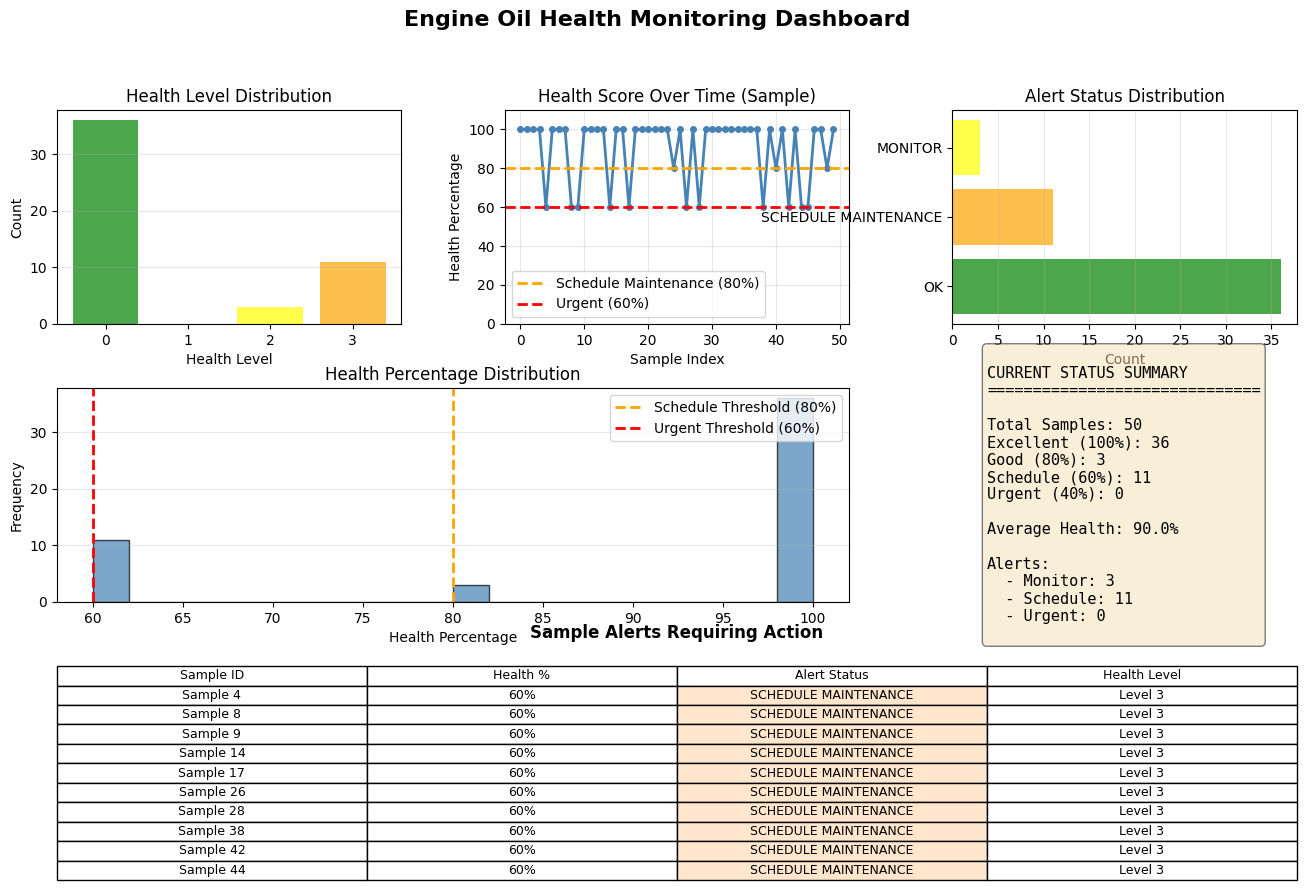


ALERT SUMMARY
Total samples analyzed: 50
  - OK (Excellent): 36
  - Monitor: 3
  - Schedule Maintenance: 11
  - Urgent Maintenance: 0

Average Health Score: 90.0%
Model Accuracy: 1.000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load data
X = pd.read_csv('features_engine_oil.csv')
y = pd.read_csv('target_engine_oil.csv').values.ravel()

# Remove rare class if needed
X = X[y != 1]
y = y[y != 1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model for predictions
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# ========================================
# ALERT LOGIC: Define Health Thresholds
# ========================================
print("=" * 60)
print("ALERT LOGIC - HEALTH THRESHOLDS")
print("=" * 60)

# Define health thresholds based on oil health levels
# Health levels: 0 = Excellent, 2 = Good, 3 = Fair, 4 = Poor
HEALTH_THRESHOLDS = {
    'excellent': 0,      # Health level 0 - No action needed
    'good': 2,           # Health level 2 - Monitor
    'schedule_maintenance': 3,  # Health level 3 - Schedule maintenance (80% threshold)
    'urgent': 4          # Health level 4 - Urgent maintenance (60% threshold)
}

# Convert health levels to percentage scores (for visualization)
def health_level_to_percentage(health_level):
    """Convert health level to percentage (higher is better)"""
    mapping = {
        0: 100,  # Excellent
        2: 80,   # Good
        3: 60,   # Fair - Schedule maintenance
        4: 40    # Poor - Urgent
    }
    return mapping.get(health_level, 50)

def get_alert_status(health_level):
    """Get alert status based on health level"""
    if health_level == 0:
        return "OK", "green"
    elif health_level == 2:
        return "MONITOR", "yellow"
    elif health_level == 3:
        return "SCHEDULE MAINTENANCE", "orange"
    elif health_level >= 4:
        return "URGENT MAINTENANCE", "red"
    else:
        return "UNKNOWN", "gray"

print("\nHealth Thresholds Defined:")
print(f"  Excellent (100%): Health level 0 - No action needed")
print(f"  Good (80%): Health level 2 - Monitor")
print(f"  Schedule Maintenance (60%): Health level 3 - Schedule maintenance")
print(f"  Urgent (40%): Health level 4 - Urgent maintenance required")

# ========================================
# DASHBOARD: Health Score and Alerts
# ========================================
print("\n" + "=" * 60)
print("DASHBOARD: Engine Oil Health Monitoring")
print("=" * 60)

# Predict on test set
y_pred = rf_model.predict(X_test_scaled)

# Create dashboard data
dashboard_data = pd.DataFrame({
    'actual_health': y_test[:50],  # Show first 50 samples
    'predicted_health': y_pred[:50],
    'health_percentage': [health_level_to_percentage(h) for h in y_pred[:50]]
})

# Add alert status
dashboard_data['alert_status'] = dashboard_data['predicted_health'].apply(
    lambda x: get_alert_status(x)[0]
)
dashboard_data['alert_color'] = dashboard_data['predicted_health'].apply(
    lambda x: get_alert_status(x)[1]
)

# Create dashboard visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Health Score Distribution
ax1 = fig.add_subplot(gs[0, 0])
health_counts = dashboard_data['predicted_health'].value_counts().sort_index()
colors_map = {0: 'green', 2: 'yellow', 3: 'orange', 4: 'red'}
colors_bar = [colors_map.get(h, 'gray') for h in health_counts.index]
ax1.bar(health_counts.index, health_counts.values, color=colors_bar, alpha=0.7)
ax1.set_xlabel('Health Level')
ax1.set_ylabel('Count')
ax1.set_title('Health Level Distribution')
ax1.grid(True, alpha=0.3, axis='y')

# 2. Health Percentage Over Time (sample)
ax2 = fig.add_subplot(gs[0, 1])
sample_indices = np.arange(len(dashboard_data))
ax2.plot(sample_indices, dashboard_data['health_percentage'], marker='o',
         linestyle='-', linewidth=2, markersize=4, color='steelblue')
ax2.axhline(y=80, color='orange', linestyle='--', linewidth=2, label='Schedule Maintenance (80%)')
ax2.axhline(y=60, color='red', linestyle='--', linewidth=2, label='Urgent (60%)')
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Health Percentage')
ax2.set_title('Health Score Over Time (Sample)')
ax2.set_ylim(0, 110)
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Alert Status Count
ax3 = fig.add_subplot(gs[0, 2])
alert_counts = dashboard_data['alert_status'].value_counts()
alert_colors_list = [get_alert_status(
    dashboard_data[dashboard_data['alert_status'] == status]['predicted_health'].iloc[0]
)[1] for status in alert_counts.index]
ax3.barh(alert_counts.index, alert_counts.values, color=alert_colors_list, alpha=0.7)
ax3.set_xlabel('Count')
ax3.set_title('Alert Status Distribution')
ax3.grid(True, alpha=0.3, axis='x')

# 4. Health Percentage Histogram
ax4 = fig.add_subplot(gs[1, :2])
ax4.hist(dashboard_data['health_percentage'], bins=20, color='steelblue',
         alpha=0.7, edgecolor='black')
ax4.axvline(x=80, color='orange', linestyle='--', linewidth=2, label='Schedule Threshold (80%)')
ax4.axvline(x=60, color='red', linestyle='--', linewidth=2, label='Urgent Threshold (60%)')
ax4.set_xlabel('Health Percentage')
ax4.set_ylabel('Frequency')
ax4.set_title('Health Percentage Distribution')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# 5. Current Status Summary
ax5 = fig.add_subplot(gs[1, 2])
ax5.axis('off')
summary_text = f"""
CURRENT STATUS SUMMARY
{'=' * 30}

Total Samples: {len(dashboard_data)}
Excellent (100%): {len(dashboard_data[dashboard_data['predicted_health'] == 0])}
Good (80%): {len(dashboard_data[dashboard_data['predicted_health'] == 2])}
Schedule (60%): {len(dashboard_data[dashboard_data['predicted_health'] == 3])}
Urgent (40%): {len(dashboard_data[dashboard_data['predicted_health'] == 4])}

Average Health: {dashboard_data['health_percentage'].mean():.1f}%

Alerts:
  - Monitor: {len(dashboard_data[dashboard_data['alert_status'] == 'MONITOR'])}
  - Schedule: {len(dashboard_data[dashboard_data['alert_status'] == 'SCHEDULE MAINTENANCE'])}
  - Urgent: {len(dashboard_data[dashboard_data['alert_status'] == 'URGENT MAINTENANCE'])}
"""
ax5.text(0.1, 0.5, summary_text, fontsize=11, verticalalignment='center',
         family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 6. Sample Alert Table
ax6 = fig.add_subplot(gs[2, :])
ax6.axis('off')
# Create a table of alerts
alert_samples = dashboard_data[dashboard_data['predicted_health'] >= 3].head(10)
if len(alert_samples) > 0:
    table_data = []
    for idx, row in alert_samples.iterrows():
        table_data.append([
            f"Sample {idx}",
            f"{row['health_percentage']:.0f}%",
            row['alert_status'],
            f"Level {row['predicted_health']}"
        ])
    table = ax6.table(cellText=table_data,
                     colLabels=['Sample ID', 'Health %', 'Alert Status', 'Health Level'],
                     cellLoc='center',
                     loc='center',
                     bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2)
    # Color code alert cells
    for i in range(1, len(table_data) + 1):
        status = table_data[i-1][2]
        if 'URGENT' in status:
            table[(i, 2)].set_facecolor('#ffcccc')
        elif 'SCHEDULE' in status:
            table[(i, 2)].set_facecolor('#ffe6cc')
        elif 'MONITOR' in status:
            table[(i, 2)].set_facecolor('#ffffcc')
    ax6.set_title('Sample Alerts Requiring Action', fontsize=12, fontweight='bold', pad=20)
else:
    ax6.text(0.5, 0.5, 'No alerts in sample data', ha='center', va='center', fontsize=14)

plt.suptitle('Engine Oil Health Monitoring Dashboard', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Print alert summary
print("\n" + "=" * 60)
print("ALERT SUMMARY")
print("=" * 60)
print(f"Total samples analyzed: {len(dashboard_data)}")
print(f"  - OK (Excellent): {len(dashboard_data[dashboard_data['predicted_health'] == 0])}")
print(f"  - Monitor: {len(dashboard_data[dashboard_data['alert_status'] == 'MONITOR'])}")
print(f"  - Schedule Maintenance: {len(dashboard_data[dashboard_data['alert_status'] == 'SCHEDULE MAINTENANCE'])}")
print(f"  - Urgent Maintenance: {len(dashboard_data[dashboard_data['alert_status'] == 'URGENT MAINTENANCE'])}")
print(f"\nAverage Health Score: {dashboard_data['health_percentage'].mean():.1f}%")
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.3f}")
